In [1]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

from itertools import cycle, islice


In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [46]:
data_dir = 'priv_data'
out_dir = 'out'


appname = 'LUBM'
data_size_dir = 'LUBM'
collections = ['schemex', 'AttributeCollection', 'TypeCollection']
suffix = ''
hide_legend = False

appname = 'dyldo_y2019_core'
data_size_dir = 'DyLDO-core'
collections =['schemex', 'attribute', 'type']
suffix = '-test-1_clean'
hide_legend = True

#appname = 'BSBM'
#data_size_dir = 'BSBM'
#collections =['schemex', 'AttributeCollection', 'TypeCollection']
#suffix = ''
#hide_legend = True

# appname = 'dyldo_y2019_full'
# data_size_dir = 'DyLDO-ext'
# collections =['schemex', 'attribute']
# suffix = '-test-1'
# hide_legend = True

Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')


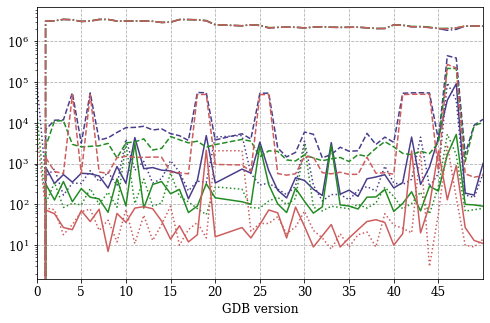

In [47]:
frames = [None, None, None]
i = 0
iterations = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        #del df['NewlyObservedSchema (SE_new)']
        #del df['DeletedSchemaStructures (SE_del)']

        
        del df['TotalNumberOfNewInstances'] 
        del df['InstanceAddedWithKnownSchema (PE_add)']
        del df['InstancesDeleted (PE_del)']
        del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
        del df['PayloadEntriesAdded'] 
        del df['PayloadEntriesRemoved'] 
        del df['InstanceToSchemaLinksAdded'] 
        del df['InstanceToSchemaLinksRemoved'] 

        del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
        
        del df['TotalNumberOfSchemaElementsWritten']
        del df['TotalNumberOfSchemaElementsDeleted']
        #del df['InstanceNotChanged (PE_mod)']
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        print(df.columns)
        df.columns = [collection+'ADD', collection+'DEL', collection+'MOD', collection+'unchanged']    #'Modified pe(v)'
        
        #df.columns = [collection+'MOD-ELEM', collection+'Unchanged v', collection+'ADD-ELEM', collection+'DEL-ELEM']    #'Modified pe(v)'
        #df = df[[collection+'ADD-ELEM', collection+'DEL-ELEM', collection+'MOD-ELEM',collection+'Unchanged v']] #'Modified pe(v)'
        frames[i] = df
        i = i + 1
        
df = pd.concat(frames, sort=False)


df.columns = ['SchemEX:ADD', 'SchemEX:DEL', 'SchemEX:MOD','SchemEX:PAY',
             'AttrColl:ADD', 'AttrColl:DEL', 'AttrColl:MOD','AttrColl:PAY',
             'TypeColl:ADD', 'TypeColl:DEL', 'TypeColl:MOD','TypeColl:PAY']
ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'], 
             color=['darkslateblue', 'darkslateblue', 'darkslateblue', 'darkslateblue', 
                    'forestgreen', 'forestgreen', 'forestgreen','forestgreen',
                   'indianred', 'indianred', 'indianred','indianred'])
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.set_xlabel("GDB version")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png', bbox_inches = 'tight')



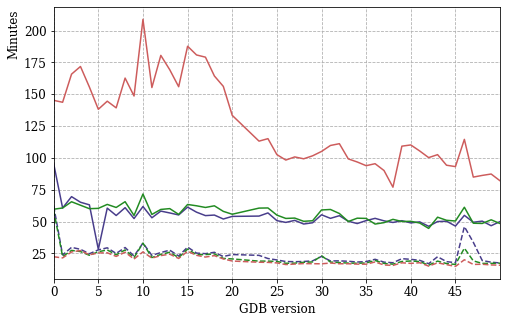

In [48]:
frames = [None, None, None]
i = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-performance.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')

        del df['Load Graph']
        del df['Parse Graph']
        del df['Partition Graph']
        del df['Schema Computation']
        del df['Updates']
        df.columns = [collection + '-Inc', collection + '-Batch']    
        convert = lambda x: x / 1000 / 60
        df = df.applymap(convert)  
        frames[i] = df
        i = i + 1
    
    
df = pd.concat(frames, sort=False)
df.columns = ['SchemEX:Incr', 'SchemEX:Batch', 
             'AttrColl:Incr', 'AttrColl:Batch',
             'TypeColl:Incr', 'TypeColl:Batch']


ax = df.plot(logy=False, style = ['--','-','--','-','--','-'], color=['darkslateblue', 'darkslateblue',
                    'forestgreen', 'forestgreen', 'indianred', 'indianred'])
ax.set_xlabel("GDB version")
ax.set_ylabel("Minutes")
ax.yaxis.set_label_coords(-0.075,.9)
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), shadow=True, ncol=3)
if hide_legend:
    ax.get_legend().remove()

plt.grid(True)

plt.savefig(out_dir + '/' + appname + '-performance.png', bbox_inches = 'tight')
    


MAX: 0    11566501
dtype: int64
MIN: 0    8
dtype: int64
           0
21         8
38   6145732
42   6275794
45   6319184
37   6344098
34   6420219
26   6422157
33   6432119
27   6463308
35   6468510
50   6488368
30   6502058
47   6505648
28   6541414
29   6550937
44   6574434
49   6574853
32   6608944
48   6617660
31   6640832
22   6705798
41   6906470
40   6936178
43   6974785
39   6978353
25   6996181
24   7122506
23   7137144
36   7453650
20   7586025
46   7792057
14   8755542
19   8789636
9    8794665
11   8834488
1    9220298
17   9364328
4    9465024
7    9481631
12   9543222
16   9584034
0    9653266
18   9886701
13  11101931
5   11195418
3   11273950
6   11411817
8   11505839
2   11517193
10  11534864
15  11566501


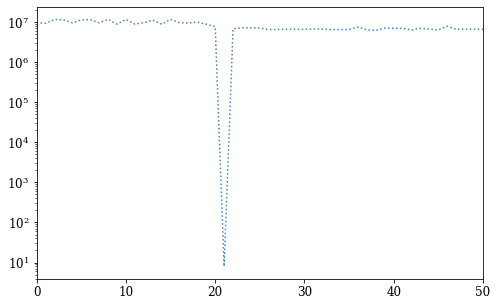

In [49]:
curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]
onlyfiles = sorted(onlyfiles)

edgecounts = {}
tmp = 0
for filename in onlyfiles:
    # first line: number of types in dataset (not unique)
    # second line: number of edges in dataset (not unique)
    f = open(join(curr_dir,filename), 'r')
    content = f.read().split('\n')
    if len(content) > 2:
        edges = int(content[1])
    else:
        edges = int(content[0])
    if 'iteration' in filename:
        iteration = filename.replace('iteration', '')
        iteration = iteration.replace('-', '')
        iteration = iteration.replace('.txt', '')
        iteration = iteration.replace('.gz', '')
        iteration = iteration.replace('.nq', '')
        iteration = iteration.replace('.nt', '')
               
        edgecounts[int(iteration)] = edges
    else:
        edgecounts[tmp] = edges
        tmp = tmp + 1
        
edgeframe = pd.DataFrame.from_dict(edgecounts, orient='index')
edgeframe = pd.DataFrame.sort_index(edgeframe)
#print(edgeframe)
ax = edgeframe.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'],
             color=['steelblue', 'steelblue', 'steelblue', 'steelblue','indianred','indianred','indianred','indianred']) # 'gray',
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
#plt.xticks(np.arange(0, 50, 5.0))
print("MAX: " + str(edgeframe.max()))
print("MIN: " + str(edgeframe.min()))

print(edgeframe.sort_values(0))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
if hide_legend:
    ax.get_legend().remove()

In [55]:
size_frame = pd.DataFrame()

for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
#         tmpFrame = pd.DataFrame()
#         tmpFrame['A'] = df['SE links']
#         tmpFrame['B'] = df['Imprint links']

#         tmpFrame = pd.DataFrame()
#         tmpFrame['A'] = df['Schema Elements (SE)']
#         tmpFrame['B'] = df['Schema Relations (SR)']

        #df['Summary Graph Size'] = tmpFrame.sum(axis=1)

        del df['SecondaryIndex Read time (ms)']
        del df['SecondaryIndex Write time (ms)']
        del df['SecondaryIndex Del time (ms)']
        #--->
        del df['SecondaryIndex Total time (ms)']
        #<----
        # number of primary vertices
        #del df['SE links']
        if not size_frame.empty:
            del df['Imprint links']
        del df['Checksum links']
        #del df['Schema Elements (SE)']
        #del df['Schema Relations (SR)']

        del df['SG Read time (ms)']
        del df['SG Write time (ms)']
        del df['SG Del time (ms)']

        del df['Sec. Index Size (bytes)']
        del df['Index Size (bytes)']
        del df['Graph Size (bytes)']
        #print(df)
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        #print(df.columns)
        if not size_frame.empty:
            df.columns = [collection+'|[v]|', collection+'|V_sg|', collection+'|E_sg|']
        else:
            df.columns = [collection+'|[v]|', '|V|', collection+'|SG|', collection+'|E_sg|']  

        if not size_frame.empty:
            size_frame = size_frame.join(df, how='outer', lsuffix='_left', rsuffix='_right')
        else:
            size_frame = df

    

print(size_frame)


           schemex|[v]|      |V|  schemex|SG|  schemex|E_sg|  attribute|[v]|  \
Iteration                                                                      
0                111887  3435472       115684         452960           19954   
1                111541  3228961       115367         448840           19735   
2                111954  3507224       115765         451752           19949   
3                111585  3492781       115393         444461           19670   
4                111564  3450659       115364         444567           19660   
5                111312  3223252       115136         441913           19513   
6                111420  3476487       115253         443217           19606   
7                111284  3487983       115116         442431           19571   
8                111649  3495212       115495         444755           19705   
9                111095  3178334       114910         442621           19368   
10               114753  3546004       1

In [56]:
size_frame = size_frame.join(edgeframe,how='left')
size_frame

,schemex|[v]|,|V|,schemex|SG|,schemex|E_sg|,attribute|[v]|,attribute|V_sg|,attribute|E_sg|,type|[v]|,type|V_sg|,type|E_sg|,0
Iteration,,,,,,,,,,,
0,111887,3435472,115684,452960,19954,19955,199869,6013,6013,0,9653266
1,111541,3228961,115367,448840,19735,19736,196962,6022,6022,0,9220298
2,111954,3507224,115765,451752,19949,19950,198635,6037,6037,0,11517193
3,111585,3492781,115393,444461,19670,19671,192380,6028,6028,0,11273950
4,111564,3450659,115364,444567,19660,19661,192549,6036,6036,0,9465024
5,111312,3223252,115136,441913,19513,19514,190842,6032,6032,0,11195418
6,111420,3476487,115253,443217,19606,19607,191875,6071,6071,0,11411817
7,111284,3487983,115116,442431,19571,19572,191594,6018,6018,0,9481631
8,111649,3495212,115495,444755,19705,19706,192541,6052,6052,0,11505839


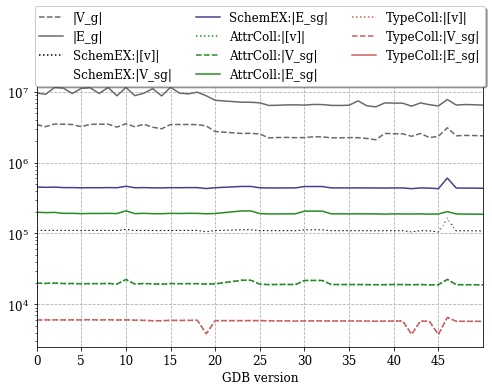

In [60]:
size_frame.columns = ['SchemEX:|[v]|', '|V_g|', 'SchemEX:|V_sg|','SchemEX:|E_sg|' 
                    , 'AttrColl:|[v]|','AttrColl:|V_sg|', 'AttrColl:|E_sg|'
                    , 'TypeColl:|[v]|', 'TypeColl:|V_sg|', 'TypeColl:|E_sg|', '|E_g|']

sorted_frame = size_frame[['|V_g|', '|E_g|', 'SchemEX:|[v]|', 'SchemEX:|V_sg|','SchemEX:|E_sg|'
                    , 'AttrColl:|[v]|', 'AttrColl:|V_sg|', 'AttrColl:|E_sg|' #]]
                    , 'TypeColl:|[v]|', 'TypeColl:|V_sg|', 'TypeColl:|E_sg|']]


ax = sorted_frame.plot(logy=True, style = ['--','-',':','--','-',':','--','-',':','--','-'], 
                       color=['dimgray', 'dimgray', 'black', 'white', 'darkslateblue',
                              'forestgreen','forestgreen','forestgreen',
                              'indianred','indianred','indianred'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])color=['dimgray', 'darkslateblue']
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, 5.0))
ax.set_xlabel("GDB version")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.275), shadow=True, ncol=3)
# if hide_legend:
#     ax.get_legend().remove()
    
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.png',  bbox_inches = 'tight')